In [43]:
import sys
import zipfile
import os
import pandas as pd
import numpy as np

%pip install kaggle
!kaggle datasets download -d shuyangli94/food-com-recipes-and-user-interactions

In [ ]:
# Define the path to your zip file and where you want to extract it
zip_file_path = "food-com-recipes-and-user-interactions.zip."
output_directory = "./Dataset_unzipped"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(output_directory)

print("Unzipping complete!")

# Configurer pandas pour afficher toutes les colonnes
pd.set_option("display.max_columns", None)

Unzipping complete!


In [ ]:
# Chemin complet vers le fichier RAW_recipes.csv
raw_recipes_path = os.path.join(output_directory, "RAW_recipes.csv")

# Lire le fichier CSV
recipes_df = pd.read_csv(raw_recipes_path)

In [ ]:
raw_interactions_path = os.path.join(output_directory, "RAW_interactions.csv")

# Lire le fichier CSV
interactions_df = pd.read_csv(raw_interactions_path)

In [65]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [66]:
interactions_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


### une vue d'ensemble des colonnes disponibles et de leurs caractéristiques

#### RAW_recipes
###### - id : Identifiant unique de la recette.
###### - name : Nom de la recette.
###### - minutes : Temps total de préparation de la recette, en minutes.
###### - contributor_id : Identifiant de l'utilisateur qui a contribué à la recette.
###### - submitted : Date de soumission de la recette.
###### - tags : Liste de tags associés à la recette (par exemple, "végétarien", "facile").
###### - nutrition : Informations nutritionnelles de la recette, formatées sous forme de liste (calories, graisses, sucres, etc.).
###### - n_steps : Nombre d'étapes nécessaires pour réaliser la recette.
###### - steps : Liste des étapes de préparation, décrivant le processus de cuisson.
###### - description : Brève description ou introduction à la recette.
###### - ingredients : Liste des ingrédients nécessaires.
###### - n_ingredients : Nombre total d'ingrédients requis pour la recette.
#### RAW_interactions
###### - user_id : Identifiant unique de l'utilisateur qui a interagi avec une recette.
###### - recipe_id : Identifiant unique de la recette avec laquelle l'utilisateur a interagi.
###### - date : Date de l'interaction.
###### - rating : Note attribuée par l'utilisateur à la recette (en général, sur une échelle de 1 à 5).
###### - review : Commentaire de l'utilisateur sur la recette.

####  Q1:Quelles sont les caractéristiques des recettes les plus populaires ?

#### Q2:Quels sont les facteurs influençant les notes des recettes, en prenant en compte le temps de préparation, le nombre d'étapes, et les ingrédients utilisés ?

Pour répondre à ces deux questions, il sera effectivement nécessaire d'utiliser à la fois les datasets RAW_recipes et RAW_interactions:

RAW_recipes : Ce dataset contient les caractéristiques des recettes, telles que le temps de préparation (minutes), le nombre d'étapes (n_steps), et les ingrédients (ingredients, n_ingredients). Ces informations sont essentielles pour analyser les attributs des recettes.

RAW_interactions : Ce dataset fournit les notes des utilisateurs (rating), qui sont nécessaires pour évaluer la popularité des recettes et analyser les facteurs influençant les notes. Il permet également de déterminer quelles recettes sont les plus populaires en fonction du nombre de notes et de la moyenne des évaluations.

In [ ]:
# 2. Vérifier les types de données
print("\nTypes de données pour RAW recipes:")
print(recipes_df.dtypes.to_string())
print("\nTypes de données pour RAW interactions:")
print(interactions_df.dtypes.to_string())


Types de données pour RAW recipes:
name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64

Types de données pour RAW interactions:
user_id       int64
recipe_id     int64
date         object
rating        int64
review       object


In [68]:
# 3. Obtenir des informations statistiques descriptives
print("\nStatistiques descriptives pour RAW_recipes:")
print(recipes_df.describe())  # Inclut toutes les colonnes pour les statistiques


Statistiques descriptives pour RAW_recipes:
                  id       minutes  contributor_id        n_steps  \
count  231637.000000  2.316370e+05    2.316370e+05  231637.000000   
mean   222014.708984  9.398546e+03    5.534885e+06       9.765499   
std    141206.635626  4.461963e+06    9.979141e+07       5.995128   
min        38.000000  0.000000e+00    2.700000e+01       0.000000   
25%     99944.000000  2.000000e+01    5.690500e+04       6.000000   
50%    207249.000000  4.000000e+01    1.736140e+05       9.000000   
75%    333816.000000  6.500000e+01    3.982750e+05      12.000000   
max    537716.000000  2.147484e+09    2.002290e+09     145.000000   

       n_ingredients  
count  231637.000000  
mean        9.051153  
std         3.734796  
min         1.000000  
25%         6.000000  
50%         9.000000  
75%        11.000000  
max        43.000000  


In [ ]:
# Nombre total de recettes
total_recipes_count = recipes_df.shape[0]
# Compter les recettes dont la durée "minutes" est égale à 0 ou nulle
zero_or_null_minutes_count = recipes_df[
    recipes_df["minutes"].isnull() | (recipes_df["minutes"] == 0)
].shape[0]
# Compter les recettes n'ayant pas de nom
no_name_count = recipes_df[
    recipes_df["name"].isnull() | (recipes_df["name"] == "")
].shape[0]
# Compter les recettes n'ayant pas d'ingrédients
no_ingredients_count = recipes_df[
    recipes_df["ingredients"].isnull() | (recipes_df["ingredients"] == "")
].shape[0]
# Compter les recettes n'ayant pas de steps
no_steps_count = recipes_df[
    recipes_df["steps"].isnull() | (recipes_df["steps"] == "")
].shape[0]

# Compter les recettes dont n_steps est supérieur à 30
greater_than_30_steps_count = recipes_df[recipes_df["n_steps"] > 30].shape[0]
# Compter les recettes dont n_ingredients est supérieur à 25
greater_than_25_ingredients_count = recipes_df[recipes_df["n_ingredients"] > 25].shape[
    0
]


# Ajouter une nouvelle colonne steps_count en comptant le nombre d'éléments dans steps
recipes_df["steps_count"] = recipes_df["steps"].apply(
    lambda x: len(eval(x)) if pd.notnull(x) else 0
)

# Comparer steps_count et n_steps
different_steps_count = recipes_df[
    recipes_df["steps_count"] != recipes_df["n_steps"]
].shape[0]

# Ajouter une nouvelle colonne ingredients_count en comptant le nombre d'éléments dans ingredients
recipes_df["ingredients_count"] = recipes_df["ingredients"].apply(
    lambda x: len(eval(x)) if pd.notnull(x) else 0
)

# Comparer ingredients_count et n_ingredients
different_ingredients_count = recipes_df[
    recipes_df["ingredients_count"] != recipes_df["n_ingredients"]
].shape[0]

# Afficher les résultats avant suppression
print(f"Nombre total de recettes : {total_recipes_count}")
print(
    f"Nombre de recettes dont la durée est égale à 0 ou nulle : {zero_or_null_minutes_count}"
)
print(f"Nombre de recettes n'ayant pas de nom : {no_name_count}")
print(f"Nombre de recettes n'ayant pas de steps : {no_steps_count}")
print(f"Nombre de recettes n'ayant pas d'ingrédients : {no_ingredients_count}")
print(
    f"Nombre de recettes dont n_steps est supérieur à 30 : {greater_than_30_steps_count}"
)
print(
    f"Nombre de recettes dont n_ingredients est supérieur à 25 : {greater_than_25_ingredients_count}"
)
print(
    f"Nombre de recettes où steps_count est différent de n_steps : {different_steps_count}"
)
print(
    f"Nombre de recettes où ingredients_count est différent de n_ingredients : {different_ingredients_count}"
)

Nombre total de recettes : 231637
Nombre de recettes dont la durée est égale à 0 ou nulle : 1094
Nombre de recettes n'ayant pas de nom : 1
Nombre de recettes n'ayant pas de steps : 0
Nombre de recettes n'ayant pas d'ingrédients : 0
Nombre de recettes dont n_steps est supérieur à 30 : 2165
Nombre de recettes dont n_ingredients est supérieur à 25 : 235
Nombre de recettes où steps_count est différent de n_steps : 0
Nombre de recettes où ingredients_count est différent de n_ingredients : 0


In [ ]:
# Supprimer les recettes dont la durée est égale à 0 ou nulle
recipes_df = recipes_df[
    ~(recipes_df["minutes"].isnull() | (recipes_df["minutes"] == 0))
]
# Supprimer les recettes n'ayant pas de nom
recipes_df = recipes_df[~(recipes_df["name"].isnull() | (recipes_df["name"] == ""))]
# Supprimer les recettes n'ayant pas d'ingrédients
recipes_df = recipes_df[
    ~(recipes_df["ingredients"].isnull() | (recipes_df["ingredients"] == ""))
]
# Supprimer les recettes n'ayant pas de steps
recipes_df = recipes_df[~(recipes_df["steps"].isnull() | (recipes_df["steps"] == ""))]
# Supprimer les recettes dont n_steps est supérieur à 30
recipes_df = recipes_df[recipes_df["n_steps"] <= 30]
# Supprimer les recettes dont n_ingredients est supérieur à 25
recipes_df = recipes_df[recipes_df["n_ingredients"] <= 25]
# Supprimer les lignes où il y a une différence entre steps_count et n_steps
recipes_df = recipes_df[recipes_df["steps_count"] == recipes_df["n_steps"]]
# Supprimer les lignes où il y a une différence entre ingredients_count et n_ingredients
recipes_df = recipes_df[recipes_df["ingredients_count"] == recipes_df["n_ingredients"]]

In [ ]:
# Nombre total de recettes aapres suppression
total_recipes_count_after = recipes_df.shape[0]
# Afficher les résultats apres suppression
print(f"Nombre total de recettes apres la suppression: {total_recipes_count}")

Nombre total de recettes apres la suppression: 231637


In [ ]:
recipes_df = recipes_df.drop(
    [
        "contributor_id",
        "submitted",
        "nutrition",
        "description",
        "steps",
        "ingredients_count",
        "steps_count",
    ],
    axis=1,
)

In [ ]:
interactions_df = interactions_df.drop(["review", "date", "user_id"], axis=1)

In [ ]:
recipes_df.to_csv("recipes.csv", index=False)

In [ ]:
interactions_df.to_csv("interactions.csv", index=False)

In [76]:
print("\nStatistiques descriptives pour RAW_recipes:")
print(recipes_df.describe())  # Inclut toutes les colonnes pour les statistiques


Statistiques descriptives pour RAW_recipes:
                  id       minutes        n_steps  n_ingredients
count  228204.000000  2.282040e+05  228204.000000  228204.000000
mean   222627.459015  9.535735e+03       9.488821       8.991604
std    140599.124239  4.495400e+06       5.257607       3.648883
min        38.000000  1.000000e+00       0.000000       1.000000
25%    100981.500000  2.000000e+01       6.000000       6.000000
50%    207949.500000  4.000000e+01       9.000000       9.000000
75%    333842.250000  6.500000e+01      12.000000      11.000000
max    537716.000000  2.147484e+09      30.000000      25.000000


#### Après avoir effectué la description statistique, nous constatons qu'il y a des informations aberrantes, car les valeurs maximales pour les minutes , n_ingredients et n_steps sont très élevées par rapport à la moyenne et au 75e percentile.

In [77]:
print("\nStatistiques descriptives pour RAW_interactions:")
print(interactions_df.describe())


Statistiques descriptives pour RAW_interactions:
          recipe_id        rating
count  1.132367e+06  1.132367e+06
mean   1.608972e+05  4.411016e+00
std    1.303987e+05  1.264752e+00
min    3.800000e+01  0.000000e+00
25%    5.425700e+04  4.000000e+00
50%    1.205470e+05  5.000000e+00
75%    2.438520e+05  5.000000e+00
max    5.377160e+05  5.000000e+00


#### Les statistiques descriptives révèlent que les recettes sur le site sont généralement bien notées, avec une forte concentration des évaluations autour de la note maximale de 5.

In [78]:
# 4. Vérifier les valeurs manquantes
print("\nValeurs manquantes dans RAW recipes:")
print(recipes_df.isnull().sum())

print("\nValeurs manquantes dans RAW interactions:")
print(interactions_df.isnull().sum())


Valeurs manquantes dans RAW recipes:
name             0
id               0
minutes          0
tags             0
n_steps          0
ingredients      0
n_ingredients    0
dtype: int64

Valeurs manquantes dans RAW interactions:
recipe_id    0
rating       0
dtype: int64


In [ ]:
# 5. Identifier les doublons
print("\nDoublons dans RAW_recipes:")
print(recipes_df.duplicated().sum())  # Affiche le nombre de doublons


Doublons dans RAW_recipes:
0


In [ ]:
# 6. Analyse des catégories et des types de données non numériques
if "tags" in recipes_df.columns:
    print("\nValeurs uniques dans les tags:")
    print(recipes_df["tags"].value_counts())  # Fréquence des tags


Valeurs uniques dans les tags:
tags
['15-minutes-or-less', 'time-to-make', 'course', 'preparation', 'for-1-or-2', '5-ingredients-or-less', 'beverages', 'easy', 'cocktails', 'number-of-servings', '3-steps-or-less']                                                                                                                                                        397
['60-minutes-or-less', 'time-to-make', 'preparation']                                                                                                                                                                                                                                                                                    320
['time-to-make', 'preparation', '4-hours-or-less']                                                                                                                                                                                                                                                       

#### D'après les tags, nous avons de nombreuses caractéristiques et informations décrites dans cette colonne, telles que le pays d'origine, le temps de préparation, le type de plat ou le type de repas.

In [ ]:
if "ingredients" in recipes_df.columns:
    print("\nValeurs uniques dans les ingrédients:")
    # Pour afficher les ingrédients, vous pouvez éventuellement convertir la colonne en liste
    # Ici, nous considérons que la colonne 'ingredients' contient des listes sous forme de chaînes de caractères
    all_ingredients = (
        recipes_df["ingredients"].str.cat(sep=",").split(",")
    )  # Concatène et divise par les virgules
    ingredient_counts = pd.Series(all_ingredients).value_counts()
    print(ingredient_counts)


Valeurs uniques dans les ingrédients:
 'salt'                  76387
 'butter'                37997
 'sugar'                 37719
 'onion'                 35189
 'eggs'                  27926
                         ...  
 'borage leaves'             1
['garfava flour'             1
['gluten-free butter'        1
 'risoni']                   1
 'olive salad']              1
Name: count, Length: 29307, dtype: int64


### Visualisation préliminaire

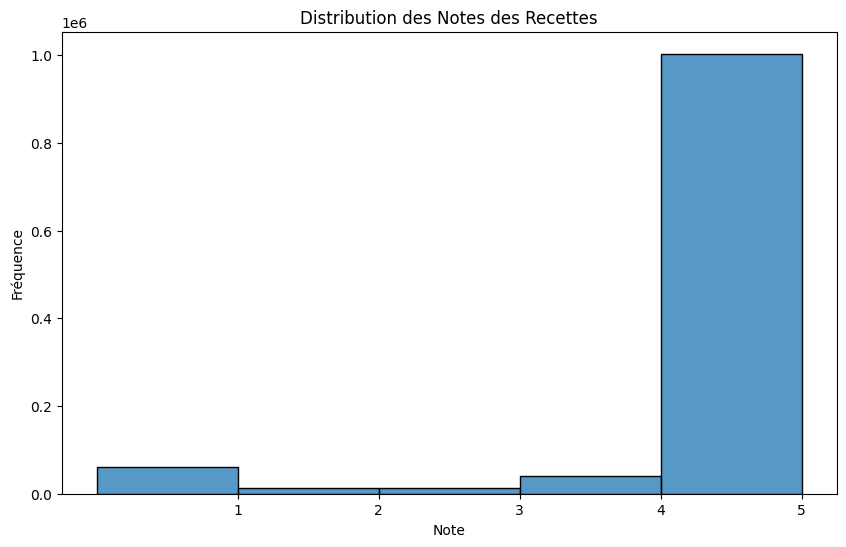

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme pour les notes dans RAW_interactions
plt.figure(figsize=(10, 6))
sns.histplot(data=interactions_df, x="rating", bins=5, kde=False)
plt.title("Distribution des Notes des Recettes")
plt.xlabel("Note")
plt.ylabel("Fréquence")
plt.xticks(range(1, 6))
plt.show()

#### Comme nous l'avons mentionné précédemment, dans le dataset des interactions, la majorité des notes sont de 5. On trouve également des notes de 0 et de 4, mais elles sont beaucoup moins fréquentes par rapport à la note de 5

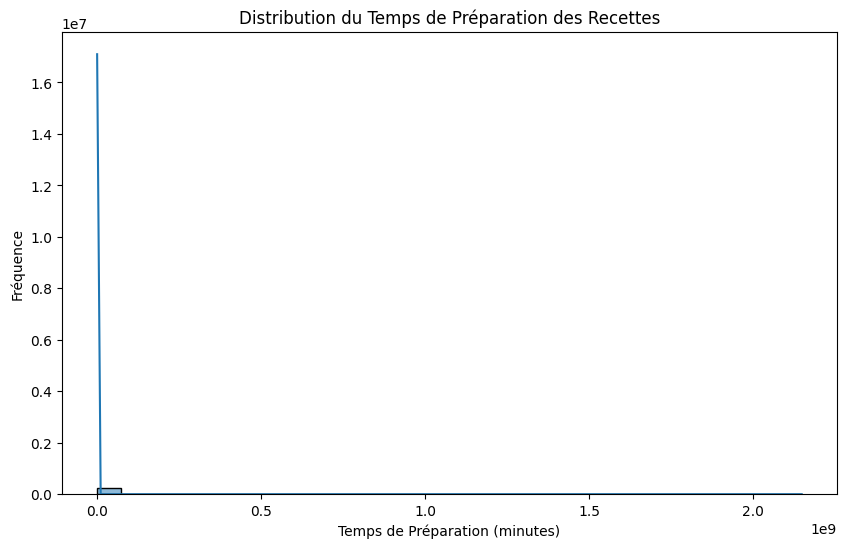

In [ ]:
# 7. Visualisation préliminaire
# Histogramme pour le temps de préparation dans RAW_recipes
plt.figure(figsize=(10, 6))
sns.histplot(data=recipes_df, x="minutes", bins=30, kde=True)
plt.title("Distribution du Temps de Préparation des Recettes")
plt.xlabel("Temps de Préparation (minutes)")
plt.ylabel("Fréquence")
plt.show()

#### Ce graphique montre la distribution du temps de préparation des recettes. On observe un nombre important de valeurs aberrantes (outliers) avec des temps de préparation très longs, ce qui rend difficile une analyse ou une interprétation claire de la distribution générale. Pour mieux exploiter le dataset et obtenir des résultats plus significatifs, nous avons décidé d'éliminer ces valeurs aberrantes.

### les valeurs aberrantes

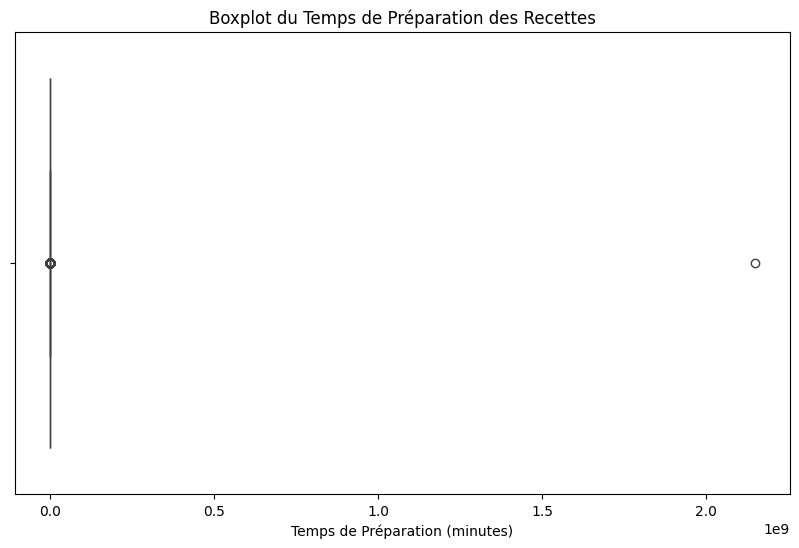

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=recipes_df["minutes"])
plt.title("Boxplot du Temps de Préparation des Recettes")
plt.xlabel("Temps de Préparation (minutes)")
plt.show()

#### D'après le box plot, nous avons des valeurs aberrantes qu'il faut éliminer pour mieux exploiter notre dataset.

In [ ]:
# Calculate some basic statistics
avg_prep_time = recipes_df["minutes"].mean()
avg_ingredient_count = recipes_df["n_ingredients"].mean()

print(f"Average Preparation Time: {avg_prep_time/60} hrs")
print(f"Average Number of Ingredients: {avg_ingredient_count}")

Average Preparation Time: 158.92891557553767 hrs
Average Number of Ingredients: 8.991604003435523


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
recipe_features = recipes_df.select_dtypes(
    include=[np.number]
)  # Select numerical features only
scaled_features = scaler.fit_transform(recipe_features)

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Add PCA results to the DataFrame
recipes_df["PCA1"] = pca_result[:, 0]
recipes_df["PCA2"] = pca_result[:, 1]

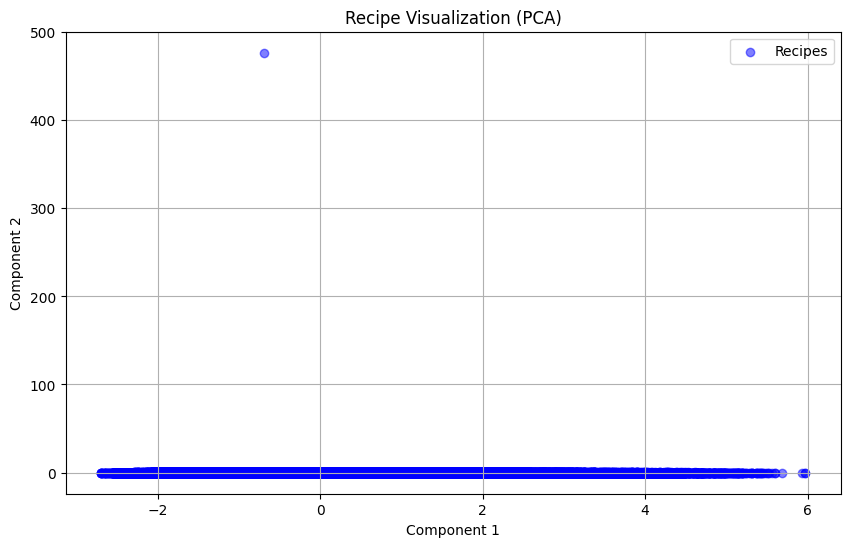

In [ ]:
# Plot PCA or t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(
    recipes_df["PCA1"], recipes_df["PCA2"], c="blue", alpha=0.5, label="Recipes"
)

# Labels and title
plt.title("Recipe Visualization (PCA)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

#### Pour éliminer les valeurs aberrantes, j'ai utilisé la méthode de l'intervalle interquartile (IQR). Cette méthode consiste à calculer le premier quartile (Q1) et le troisième quartile (Q3) d'une variable. Ensuite, on détermine l'IQR en soustrayant Q1 de Q3. Les valeurs qui se situent en dehors des limites définies par 1,5 fois l'IQR sont considérées comme des outliers. Cette approche permet d'identifier et de supprimer les valeurs extrêmes afin d'améliorer l'analyse des données.

In [ ]:
def clean_outliers(df, column):
    """Supprime les outliers d'une colonne basée sur l'IQR."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# Afficher la taille originale et la taille après nettoyage
print(f"Taille originale du dataset : {len(recipes_df)}")

recipes_df_cleaned = clean_outliers(recipes_df, "minutes")


print(f"Taille après suppression des valeurs aberrantes : {len(recipes_df_cleaned)}")

Valeurs aberrantes détectées :
                                                 name      id  minutes  \
4                  amish  tomato ketchup  for canning   44061      190   
8                            bananas 4 ice cream  pie   70971      180   
11                      better than sex  strawberries   42198     1460   
12                    better then bush s  baked beans   67547     2970   
13                         boat house  collard greens  107517      525   
...                                               ...     ...      ...   
231575                              zuni indian bread  223290      160   
231603                        zupse bread swiss bread  115337      290   
231614  zuurkool met spek   sauerkraut and pork hocks  238017      195   
231617           zwetschgenkuchen  bavarian plum cake  386977      240   
231622                    zwiebelbrotchen onion rolls  424875      210   

                                                     tags  n_steps  \
4       ['

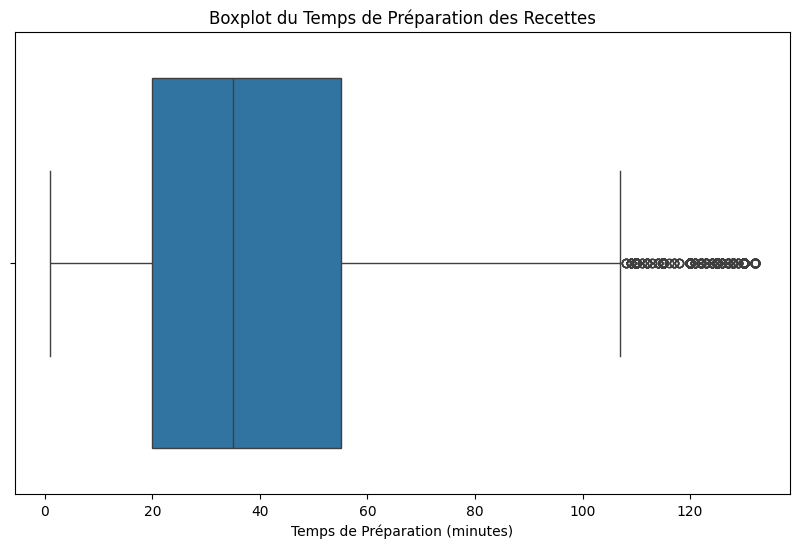

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=recipes_df_cleaned["minutes"])
plt.title("Boxplot du Temps de Préparation des Recettes")
plt.xlabel("Temps de Préparation (minutes)")
plt.show()

#### D'après le box plot, nous avons éliminé de nombreux outliers. Le premier quartile est d'environ 20 minutes, la médiane (50e percentile) est à 35 minutes, et le troisième quartile est à 55 minutes. Le minimum est de 0 minute et le maximum est de 105 minutes, ce qui est logique.

### Nous avons fait la même chose pour n_steps et n_ingredients.

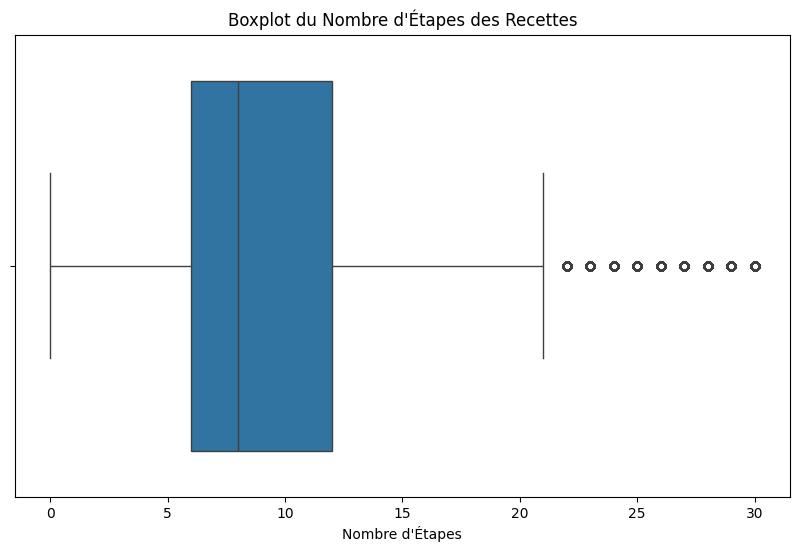

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=recipes_df_cleaned["n_steps"])
plt.title("Boxplot du Nombre d'Étapes des Recettes")
plt.xlabel("Nombre d'Étapes")
plt.show()

In [ ]:
# Afficher la taille originale et la taille après nettoyage
print(f"Taille originale du dataset : {len(recipes_df_cleaned)}")

# Supprimer les valeurs aberrantes dans 'n_steps'
recipes_df_cleaned = clean_outliers(recipes_df_cleaned, "n_steps")
print(f"Taille après suppression des valeurs aberrantes : {len(recipes_df_cleaned)}")

Taille originale du dataset : 205293
Taille après suppression des valeurs aberrantes : 199169


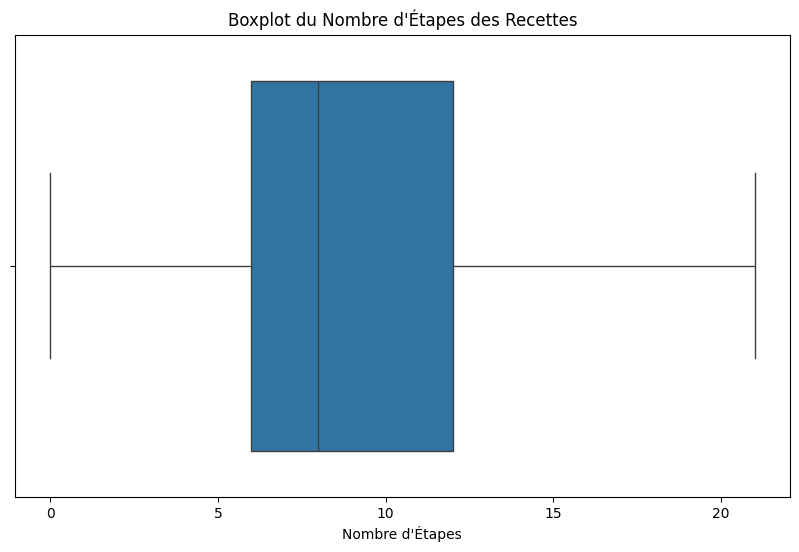

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=recipes_df_cleaned["n_steps"])
plt.title("Boxplot du Nombre d'Étapes des Recettes")
plt.xlabel("Nombre d'Étapes")
plt.show()

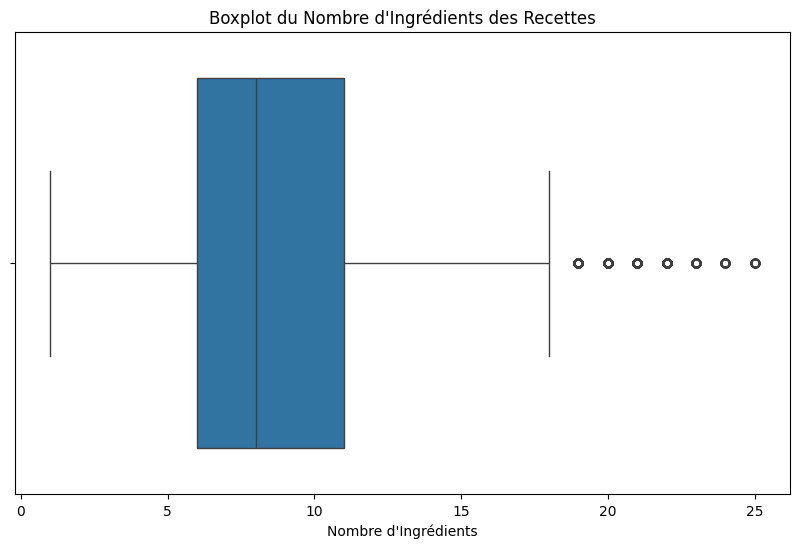

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=recipes_df_cleaned["n_ingredients"])
plt.title("Boxplot du Nombre d'Ingrédients des Recettes")
plt.xlabel("Nombre d'Ingrédients")
plt.show()

In [ ]:
# Afficher la taille originale et la taille après nettoyage
print(f"Taille originale du dataset : {len(recipes_df_cleaned)}")

# Supprimer les valeurs aberrantes dans 'n_ingredients'
recipes_df_cleaned = clean_outliers(recipes_df_cleaned, "n_ingredients")

print(f"Taille après suppression des valeurs aberrantes : {len(recipes_df_cleaned)}")

Taille originale du dataset : 199169
Taille après suppression des valeurs aberrantes : 197148


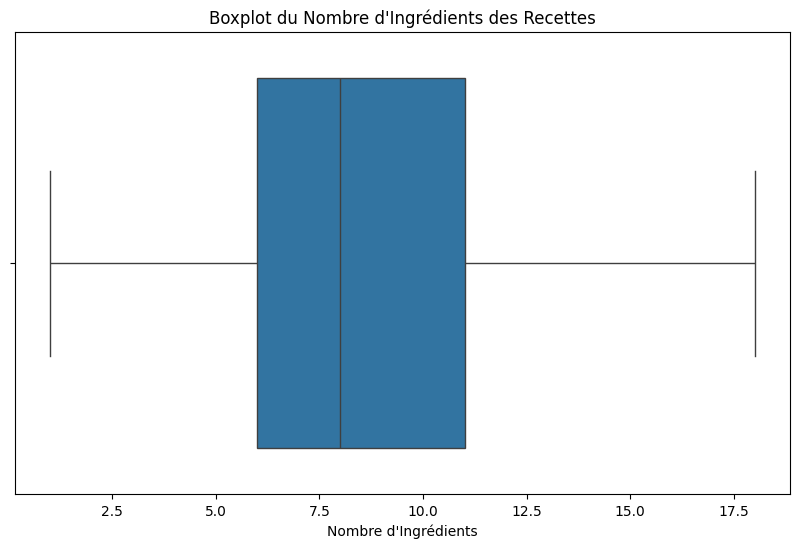

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=recipes_df_cleaned["n_ingredients"])
plt.title("Boxplot du Nombre d'Ingrédients des Recettes")
plt.xlabel("Nombre d'Ingrédients")
plt.show()

#### Maintenant, nous avons fusionné les deux datasets de recettes et d'interactions selon l'ID de la recette.

In [ ]:
# Adjusting the merge to account for different column names
merged_data = pd.merge(
    recipes_df_cleaned, interactions_df, left_on="id", right_on="recipe_id"
)

# Now, you can proceed with the merged DataFrame
print(merged_data.head())

                                         name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1  arriba   baked winter squash mexican style  137739       55   
2  arriba   baked winter squash mexican style  137739       55   
3            a bit different  breakfast pizza   31490       30   
4            a bit different  breakfast pizza   31490       30   

                                                tags  n_steps  \
0  ['60-minutes-or-less', 'time-to-make', 'course...       11   
1  ['60-minutes-or-less', 'time-to-make', 'course...       11   
2  ['60-minutes-or-less', 'time-to-make', 'course...       11   
3  ['30-minutes-or-less', 'time-to-make', 'course...        9   
4  ['30-minutes-or-less', 'time-to-make', 'course...        9   

                                         ingredients  n_ingredients      PCA1  \
0  ['winter squash', 'mexican seasoning', 'mixed ...              7 -0.270640   
1  ['winter squash', 'mexican seasoning', 'mixed .

In [ ]:
##Drop the redundant 'recipe_id' column from the merged DataFrame because we have two columns with the same information (recipe_id and id).
merged_data = merged_data.drop(columns=["recipe_id"])

#### Calcul de la note moyenne pour chaque recette

In [ ]:
recipe_ratings = merged_data.groupby("id")["rating"].mean().reset_index()
recipe_ratings.columns = ["id", "average_rating"]

# Ajouter la note moyenne au dataset nettoyé
final_data = pd.merge(recipes_df_cleaned, recipe_ratings, on="id")

#### Calcul du nombre d'interactions par recette

In [ ]:
interaction_counts = merged_data.groupby("id")["rating"].count().reset_index()
interaction_counts.columns = ["id", "num_interactions"]

# Ajouter le nombre d'interactions au dataset final
final_data = pd.merge(final_data, interaction_counts, on="id")

In [ ]:
final_data = final_data.drop(columns=["PCA1"])
final_data = final_data.drop(columns=["PCA2"])
final_data.head()

,name,id,minutes,tags,n_steps,ingredients,n_ingredients,average_rating,num_interactions
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['winter squash', 'mexican seasoning', 'mixed ...",7,5.0,3
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.5,4
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...",6,"['ground beef', 'yellow onions', 'diced tomato...",13,4.0,1
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['spreadable cheese with garlic and herbs', 'n...",11,4.5,2
4,aww marinated olives,25274,15,"['15-minutes-or-less', 'time-to-make', 'course...",4,"['fennel seeds', 'green olives', 'ripe olives'...",9,2.0,1


#### Ici, nous avons choisi de réaliser du feature engineering, où nous avons extrait des informations de la colonne minutes pour créer une nouvelle colonne catégorielle. Par exemple, pour les temps de préparation inférieurs à 30 minutes, nous avons attribué l'étiquette <30 min, entre 30 et 60 minutes, nous avons donné l'étiquette 30-60 min, etc.

In [ ]:
# créer des catégories pour le temps de préparation
final_data["prep_time_category"] = pd.cut(
    final_data["minutes"],
    bins=[0, 30, 60, 120, float("inf")],
    labels=["<30 min", "30-60 min", "1-2 hrs", ">2 hrs"],
)

In [104]:
final_data.head()

,name,id,minutes,tags,n_steps,ingredients,n_ingredients,average_rating,num_interactions,prep_time_category
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['winter squash', 'mexican seasoning', 'mixed ...",7,5.0,3,30-60 min
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.5,4,<30 min
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...",6,"['ground beef', 'yellow onions', 'diced tomato...",13,4.0,1,>2 hrs
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['spreadable cheese with garlic and herbs', 'n...",11,4.5,2,30-60 min
4,aww marinated olives,25274,15,"['15-minutes-or-less', 'time-to-make', 'course...",4,"['fennel seeds', 'green olives', 'ripe olives'...",9,2.0,1,<30 min


In [105]:
# Supprimer les lignes contenant des valeurs manquantes
final_data_reduced = final_data.dropna()

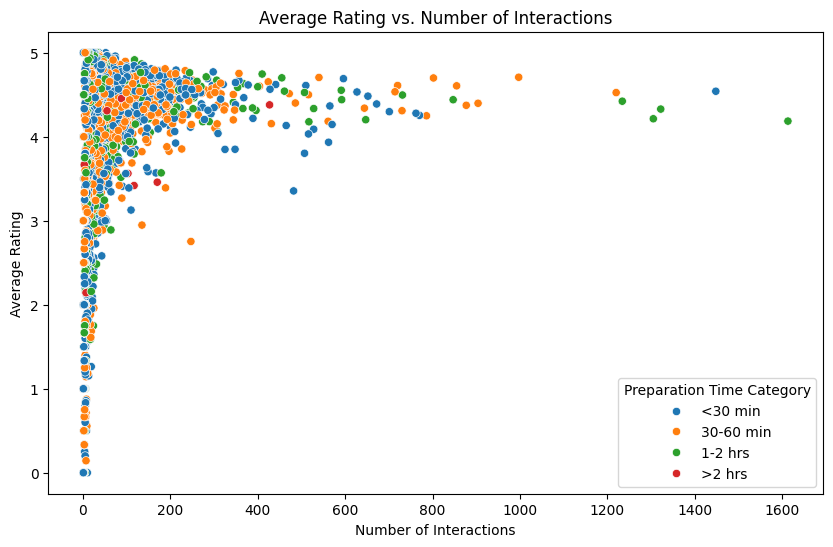

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=final_data, x="num_interactions", y="average_rating", hue="prep_time_category"
)
plt.title("Average Rating vs. Number of Interactions")
plt.xlabel("Number of Interactions")
plt.ylabel("Average Rating")
plt.legend(title="Preparation Time Category")
plt.show()

#### On ne peut pas extraire de grandes conclusions à partir de ce plot, mais ce qui est remarquable, c'est que nous ne trouvons pas de points rouges dans le graphique, représentant les recettes avec un temps de préparation de plus de 2 heures, proches de la note 5. De plus, nous remarquons que les recettes ayant un nombre d'interactions élevé se retrouvent dans toutes les catégories, à l'exception de celles de plus de 2 heures, ce qui est très logique.

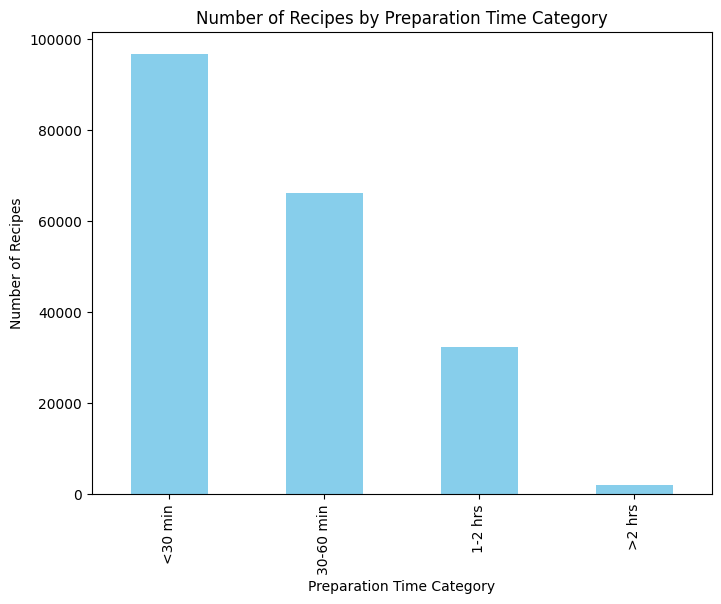

In [ ]:
# Bar plot for the number of recipes in each preparation time category
plt.figure(figsize=(8, 6))
final_data["prep_time_category"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Number of Recipes by Preparation Time Category")
plt.xlabel("Preparation Time Category")
plt.ylabel("Number of Recipes")
plt.show()

#### D'après ce diagramme à barres, nous observons que le nombre de recettes ayant un temps de préparation de moins de 30 minutes est significativement plus élevé que celui des recettes préparées en 30 à 60 minutes. De plus, le nombre de recettes dans la catégorie de 30 à 60 minutes dépasse également celui des recettes nécessitant entre 1 et 2 heures. Enfin, les recettes dont le temps de préparation dépasse 2 heures sont les moins nombreuses. Cela suggère que les utilisateurs semblent préférer des recettes rapides et accessibles.

C:\Users\Asus\AppData\Local\Temp\ipykernel_14928\1823059869.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_per_category = final_data.groupby('prep_time_category')['average_rating'].mean().reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_14928\1823059869.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_per_category, x='prep_time_category', y='average_rating', palette='viridis')


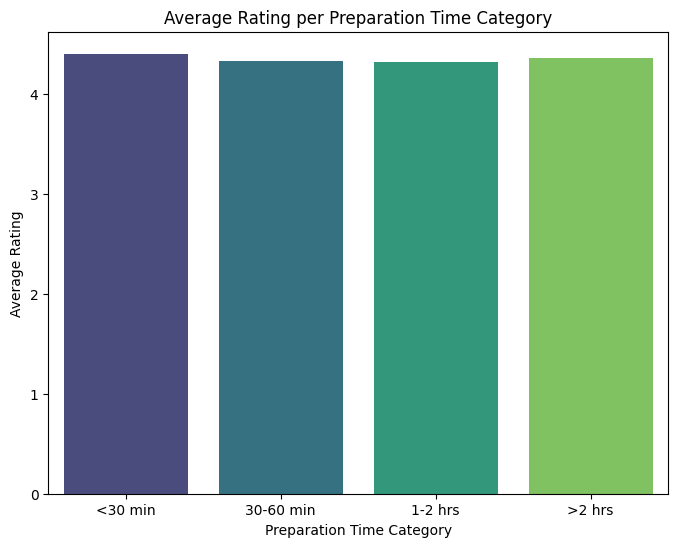

In [ ]:
# Calculer la moyenne des notes pour chaque catégorie de temps de préparation
average_rating_per_category = (
    final_data.groupby("prep_time_category")["average_rating"].mean().reset_index()
)

# Tracer un graphique en barres pour les notes moyennes par catégorie
plt.figure(figsize=(8, 6))
sns.barplot(
    data=average_rating_per_category,
    x="prep_time_category",
    y="average_rating",
    palette="viridis",
)
plt.title("Average Rating per Preparation Time Category")
plt.xlabel("Preparation Time Category")
plt.ylabel("Average Rating")
plt.show()

In [109]:
print(final_data.describe())

                  id        minutes        n_steps  n_ingredients  \
count  197148.000000  197148.000000  197148.000000  197148.000000   
mean   222487.946984      38.772460       8.824771       8.666342   
std    140283.911581      26.400224       4.387086       3.332782   
min        40.000000       1.000000       0.000000       1.000000   
25%    101068.750000      20.000000       6.000000       6.000000   
50%    208348.500000      35.000000       8.000000       8.000000   
75%    333540.500000      55.000000      12.000000      11.000000   
max    537716.000000     132.000000      21.000000      18.000000   

       average_rating  num_interactions  
count   197148.000000     197148.000000  
mean         4.360341          4.860557  
std          0.969312         17.025595  
min          0.000000          1.000000  
25%          4.000000          1.000000  
50%          4.714286          2.000000  
75%          5.000000          4.000000  
max          5.000000       1613.000000  


#### D'après le graphique et la description du dataset, nous constatons que la note moyenne de chaque recette est très élevée, avec une moyenne de 4,3 et un premier quartile à 4. Par conséquent, nous allons nous concentrer sur le nombre d'interactions. Nous définirons un seuil pour identifier les recettes populaires, en considérant ici celles qui ont un nombre d'interactions supérieur au troisième quartile. Ainsi, nous ne conserverons que les recettes ayant un minimum de 4 interactions.

In [ ]:
# Définir un seuil pour les recettes populaires (ici, les recettes avec un nombre d'interactions supérieur au troisième quartile)
threshold = final_data["num_interactions"].quantile(0.75)
print("Le seuil du troisième quartile (quantile 0.75) est :", threshold)
popular_recipes = final_data[final_data["num_interactions"] > threshold]
non_popular_recipes = final_data[final_data["num_interactions"] <= threshold]

Le seuil du troisième quartile (quantile 0.75) est : 4.0


#### Ici, nous allons étudier la corrélation entre les variables suivantes : minutes, n_ingredients, n_steps, average_rating et num_interactions

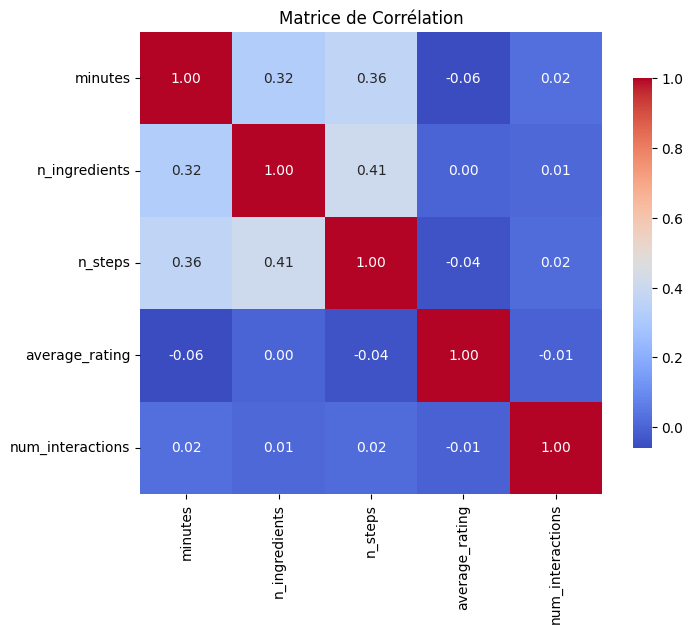

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = popular_recipes[
    ["minutes", "n_ingredients", "n_steps", "average_rating", "num_interactions"]
].corr()

# Tracer le heatmap de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Matrice de Corrélation")
plt.show()

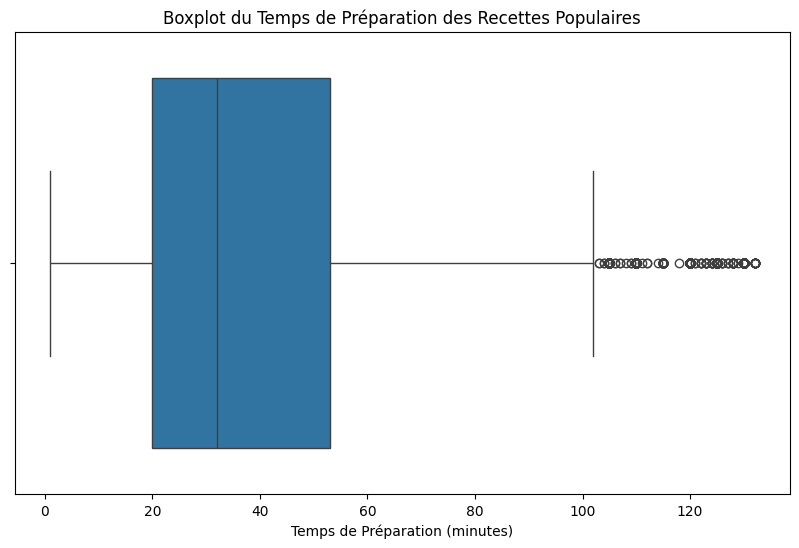

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=popular_recipes["minutes"])
plt.title("Boxplot du Temps de Préparation des Recettes Populaires")
plt.xlabel("Temps de Préparation (minutes)")
plt.show()

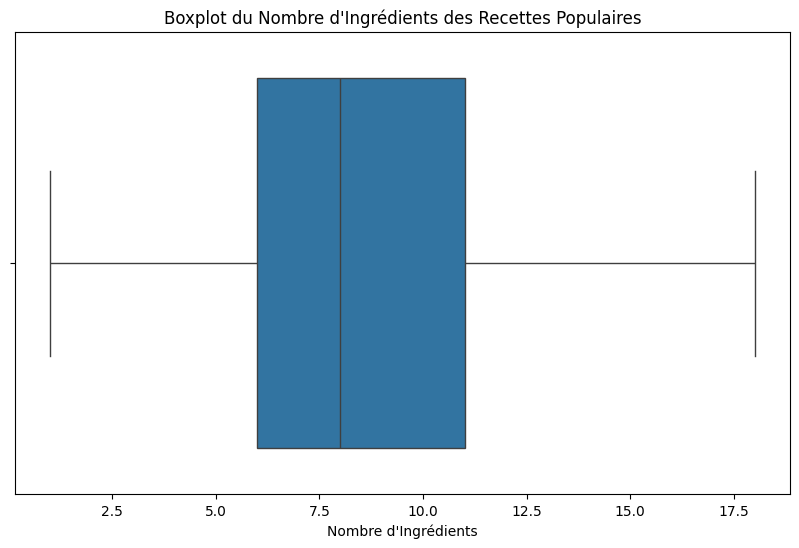

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=popular_recipes["n_ingredients"])
plt.title("Boxplot du Nombre d'Ingrédients des Recettes Populaires")
plt.xlabel("Nombre d'Ingrédients")
plt.show()

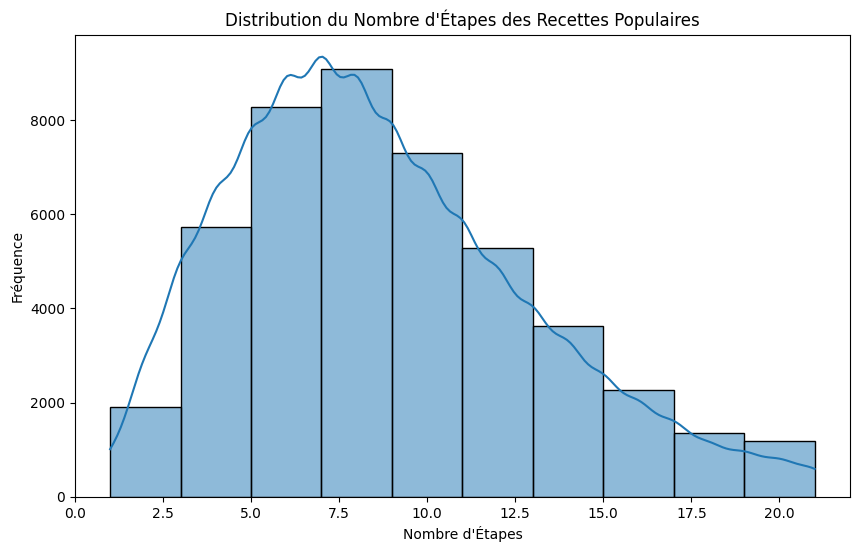

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=popular_recipes, x="n_steps", bins=10, kde=True)
plt.title("Distribution du Nombre d'Étapes des Recettes Populaires")
plt.xlabel("Nombre d'Étapes")
plt.ylabel("Fréquence")
plt.show()

### TF-IDF ingredient

relation entre ingredient specifique et les minutes

In [116]:
final_data.head()

,name,id,minutes,tags,n_steps,ingredients,n_ingredients,average_rating,num_interactions,prep_time_category
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['winter squash', 'mexican seasoning', 'mixed ...",7,5.0,3,30-60 min
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.5,4,<30 min
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...",6,"['ground beef', 'yellow onions', 'diced tomato...",13,4.0,1,>2 hrs
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['spreadable cheese with garlic and herbs', 'n...",11,4.5,2,30-60 min
4,aww marinated olives,25274,15,"['15-minutes-or-less', 'time-to-make', 'course...",4,"['fennel seeds', 'green olives', 'ripe olives'...",9,2.0,1,<30 min


In [ ]:
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 1. Vérifier que les données sont nettoyées
print(final_data["ingredients"].head())

# 2. Vectorisation TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(final_data["ingredients"])

# 3. Affichage des mots clés les plus importants (Ingrédients)
feature_names = tfidf_vectorizer.get_feature_names_out()
important_features = (
    pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    .sum()
    .sort_values(ascending=False)
)

# Sélectionner les 7 ingrédients les plus importants
top_7_ingredients = important_features.head(7)

# Afficher les 7 ingrédients les plus importants
print("\nLes 7 ingrédients les plus importants dans le dataset (basé sur TF-IDF) :")
print(top_7_ingredients)

# 4. Création du plot des 7 ingrédients les plus importants
fig_ingredients = px.bar(
    top_7_ingredients,
    x=top_7_ingredients.index,
    y=top_7_ingredients.values,
    title="Les 7 Ingrédients les Plus Importants basés sur TF-IDF",
    labels={"x": "Ingrédients", "y": "Importance (TF-IDF)"},
)

fig_ingredients.update_layout(
    xaxis_title="Ingrédients", yaxis_title="Importance (TF-IDF)", width=1000, height=600
)

# Afficher le plot
fig_ingredients.show()

0    ['winter squash', 'mexican seasoning', 'mixed ...
1    ['prepared pizza crust', 'sausage patty', 'egg...
2    ['ground beef', 'yellow onions', 'diced tomato...
3    ['spreadable cheese with garlic and herbs', 'n...
4    ['fennel seeds', 'green olives', 'ripe olives'...
Name: ingredients, dtype: object

Les 7 ingrédients les plus importants dans le dataset (basé sur TF-IDF) :
salt      10783.403302
pepper    10700.778413
sugar     10398.384070
cheese     8985.145554
butter     8812.271313
fresh      8390.204787
oil        8313.992639
dtype: float64


In [118]:
from collections import Counter

In [ ]:
# Trier les recettes par note moyenne (décroissant) et nombre d'interactions (décroissant)
# top_100_recipes = final_data.nlargest(100, 'average_rating')
# top_100_recipes = final_data[final_data['average_rating'] >= 4]
top_100_recipes = final_data.sort_values(
    by=["average_rating", "num_interactions"], ascending=[False, False]
).head(500)

# Display the top 100 recipes
print(top_100_recipes)

                                                     name      id  minutes  \
30234   caprese salad tomatoes  italian marinated toma...   55309       10   
18780                      berry cream cheese coffee cake   24768       85   
100169                kittencal s caesar tortellini salad  166669        5   
105676                       linda s special potato salad   62754       70   
25517                              broiled cinnamon toast  199171        8   
...                                                   ...     ...      ...   
30095                                         cape codder  293870        5   
31250   carls jr western bacon cheeseburger  copycat  ...  290973       30   
32627                            cedar planked bbq salmon  100382       40   
33079                      chargrilled new potato skewers  207841       40   
35021                                  cheesy potato soup   85139       35   

                                                     tags  n_st

In [ ]:
# Select the 100 recipes with the lowest average rating
# worst_100_recipes = final_data.nsmallest(100, 'average_rating')
# worst_100_recipes = final_data[final_data['average_rating'] < 4]
worst_100_recipes = final_data.sort_values(
    by=["average_rating", "num_interactions"], ascending=[True, False]
).head(500)
# Afficher les recettes médiocres
print(worst_100_recipes)

                                                     name      id  minutes  \
152068                                       sakura sauce   18260        9   
90796   homemade whipped topping substitute  or dream ...  187125       20   
663                           1 minute breakfast sandwich  533190        3   
11397                                      baja fish taco  535581       25   
61116                                    dog food dessert  220329       40   
...                                                   ...     ...      ...   
14353                                     banana cream pi  292911        5   
14385                               banana crunch ravioli  310647       13   
14573          banana nut cake with butter pecan frosting  259273       45   
14618                        banana oat breakfast cookies  189475       35   
14620                      banana oat brown sugar muffins  394669       25   

                                                     tags  n_st

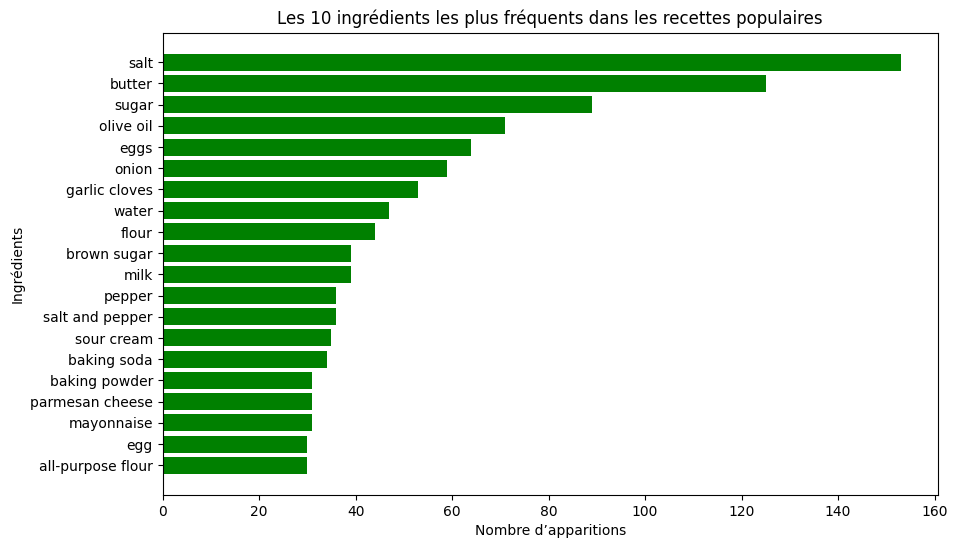

In [ ]:
from collections import Counter

# Analyser les ingrédients des recettes populaires
popular_ingredients = Counter(
    ingredient
    for ingredients in top_100_recipes["ingredients"]
    for ingredient in eval(ingredients)
)
most_common_popular = popular_ingredients.most_common(20)

# Tracer le graphique
popular_ingredients_df = pd.DataFrame(
    most_common_popular, columns=["Ingredient", "Count"]
)
plt.figure(figsize=(10, 6))
plt.barh(
    popular_ingredients_df["Ingredient"], popular_ingredients_df["Count"], color="green"
)
plt.xlabel("Nombre d’apparitions")
plt.ylabel("Ingrédients")
plt.title("Les 10 ingrédients les plus fréquents dans les recettes populaires")
plt.gca().invert_yaxis()
plt.show()

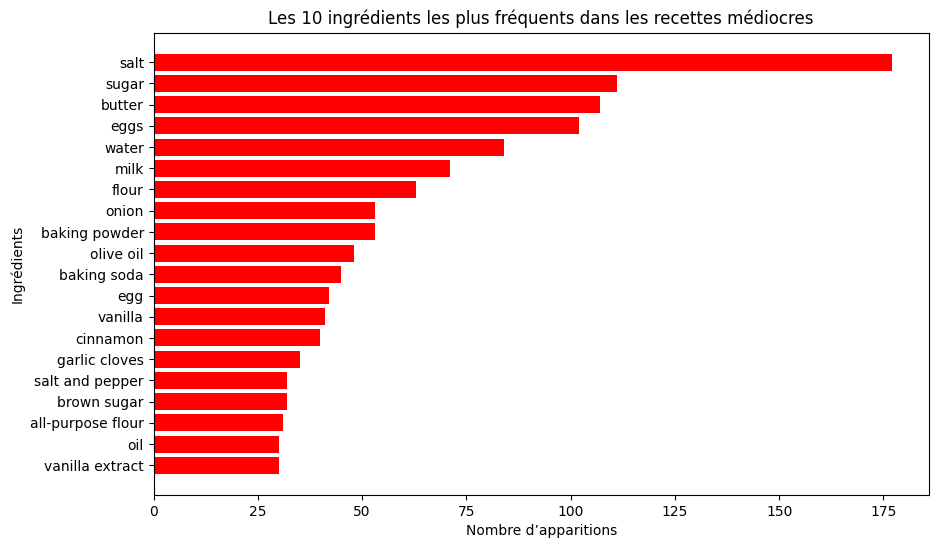

In [ ]:
# Analyser les ingrédients des recettes médiocres
mediocre_ingredients = Counter(
    ingredient
    for ingredients in worst_100_recipes["ingredients"]
    for ingredient in eval(ingredients)
)
most_common_mediocre = mediocre_ingredients.most_common(20)

# Tracer le graphique
mediocre_ingredients_df = pd.DataFrame(
    most_common_mediocre, columns=["Ingredient", "Count"]
)
plt.figure(figsize=(10, 6))
plt.barh(
    mediocre_ingredients_df["Ingredient"], mediocre_ingredients_df["Count"], color="red"
)
plt.xlabel("Nombre d’apparitions")
plt.ylabel("Ingrédients")
plt.title("Les 10 ingrédients les plus fréquents dans les recettes médiocres")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from collections import Counter

# Extraire les ingrédients des recettes populaires et médiocres
popular_ingredients = set(
    ingredient
    for ingredients in top_100_recipes["ingredients"]
    for ingredient in eval(ingredients)
)

mediocre_ingredients = set(
    ingredient
    for ingredients in worst_100_recipes["ingredients"]
    for ingredient in eval(ingredients)
)

# Compter les occurrences des ingrédients dans les recettes médiocres
mediocre_ingredient_counts = Counter(mediocre_ingredients)

# Ingrédients présents dans les recettes médiocres mais pas dans les populaires
unique_mediocre_ingredients = (
    set(mediocre_ingredient_counts.keys()) - popular_ingredients
)

# Afficher les ingrédients uniques dans les recettes médiocres, triés par leur fréquence
print("Ingrédients dans les recettes médiocres mais pas dans les recettes populaires:")
for ingredient, count in mediocre_ingredient_counts.most_common():
    if ingredient in unique_mediocre_ingredients:
        print(f"{ingredient}: {count} occurrences")

Ingrédients dans les recettes médiocres mais pas dans les recettes populaires:
sourdough english muffin: 1 occurrences
chocolate: 1 occurrences
coffee-mate: 1 occurrences
soybeans: 1 occurrences
cinnamon bark: 1 occurrences
orange blossom water: 1 occurrences
hot italian sausage: 1 occurrences
preserved lemon: 1 occurrences
fresh mint leaves: 1 occurrences
ice water: 1 occurrences
italian spices: 1 occurrences
yellow split peas: 1 occurrences
pineapple in juice: 1 occurrences
boneless pork loin: 1 occurrences
split peas: 1 occurrences
whole wheat tortillas: 1 occurrences
turkey wings: 1 occurrences
mini chocolate chips: 1 occurrences
cream of asparagus soup: 1 occurrences
english mustard: 1 occurrences
banana liqueur: 1 occurrences
egg roll wraps: 1 occurrences
worthington wham vegetable protein slices: 1 occurrences
herbed goat cheese: 1 occurrences
fresh raspberries: 1 occurrences
baking potatoes: 1 occurrences
bisquick: 1 occurrences
salmon: 1 occurrences
rose syrup: 1 occurrences
b

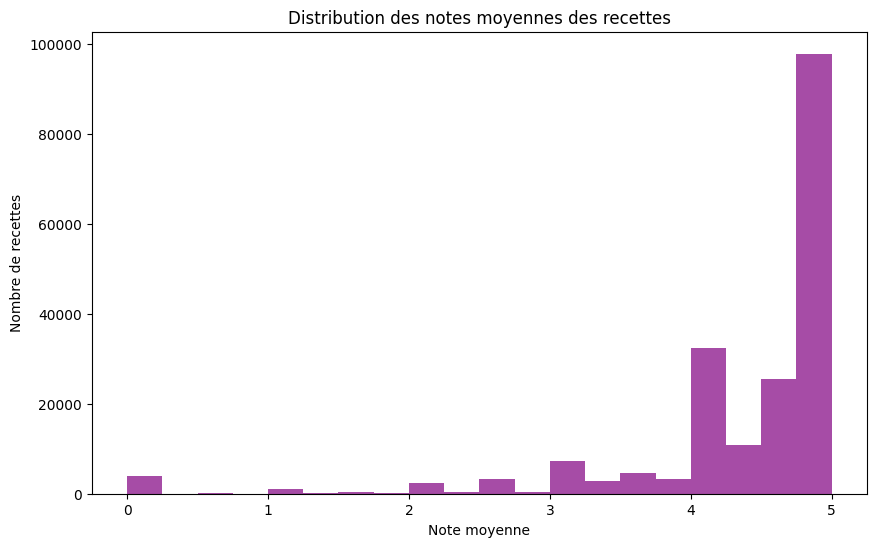

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(final_data["average_rating"], bins=20, color="purple", alpha=0.7)
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de recettes")
plt.title("Distribution des notes moyennes des recettes")
plt.show()